<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Todo:" data-toc-modified-id="Todo:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Todo:</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Initialize" data-toc-modified-id="Initialize-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initialize</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Vizualize-and-theoretical-solution" data-toc-modified-id="Vizualize-and-theoretical-solution-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Vizualize and theoretical solution</a></span></li><li><span><a href="#Graph" data-toc-modified-id="Graph-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Graph</a></span></li></ul></li><li><span><a href="#Run" data-toc-modified-id="Run-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Routines-currently-tested" data-toc-modified-id="Routines-currently-tested-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Routines currently tested</a></span></li><li><span><a href="#Useful-nx-lines" data-toc-modified-id="Useful-nx-lines-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Useful nx lines</a></span></li></ul></div>

# Todo:

- Include good vizualization of the total cost function (from previous MATLAB/Python work) in order to see what the theoretical solution is and to tune your parameters properly

- Find the good data strcutre to represent the flows over the graph

- Transform Graph into objects, to make it easier to use? 

- Stopping criterion for FW

- Introduce node potentials properly (one is the offset for the Demand function, the other one is the potential! 


# Load

In [132]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from routines import *
from helpers import *
import cvxpy as cp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialize 

## Parameters

In [95]:
#parameters
alpha=0.15
beta=4
POTENTIAL_SHIFT=80

In [104]:
#to adapt
#to be read from file if necessary
k_list=[10,10,3,10] 
l_list=[10,10,1,10]
t_list=[10,10,10,10]
phi_list=[phi(l_list[i],t_list[i]) for i in range(len(l_list))]
is_negative=[0,0,1,0]

nodes_pots=[('2_p',POTENTIAL_SHIFT)]

In [48]:
OD=dict()
N=10
OD[('1','2_p')]=N

## Vizualize and theoretical solution

In [88]:
x_12=np.linspace(0,N,100)

C1=BPR(phi_list[0],x_12,k_list[0])
C2=-BPR(phi_list[2],x_12,k_list[2])+POTENTIAL_SHIFT
KK=C1-C2

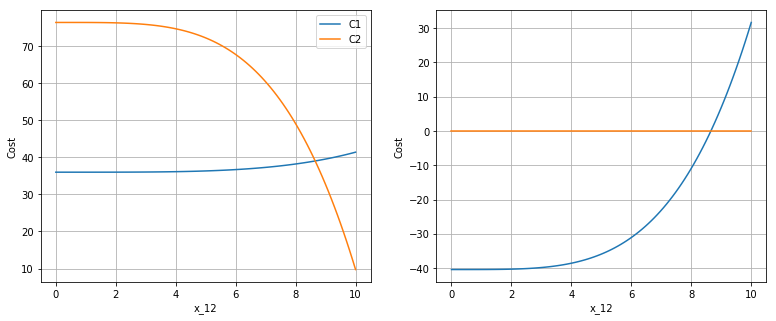

In [100]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(x_12,C1,label=("C1"))
plt.plot(x_12,C2,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(x_12,KK,label="Total Cost")
plt.plot(x_12,np.ones(x_12.shape)*0)
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.grid(True)

In [91]:
C_T=BPR_int(phi_list[0],x_12,k_list[0])+BPR_int(phi_list[2],x_12,k_list[2])-POTENTIAL_SHIFT*x_12

Text(0, 0.5, 'Integral Cost')

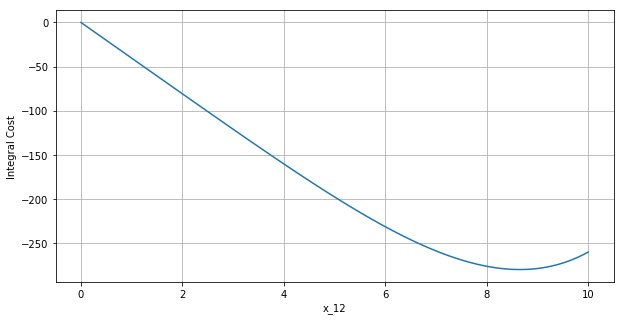

In [102]:
plt.figure(figsize=(10,5))
plt.plot(x_12,C_T)
plt.grid(True)
plt.xlabel("x_12")
plt.ylabel("Integral Cost")

## Graph

In [187]:
G.clear()

In [188]:
G=nx.DiGraph()

nodes_list=['1','2','2_p','R']
edge_list=[('1','2'),('2','1'),('2','2_p'),('1','R')]

G.add_nodes_from(nodes_list)
G.add_edges_from(edge_list)

G=init_flows(G)
G=initEdgeAttr(G,edge_list,k_list,phi_list,is_negative)
G=initPotShifts(G,nodes_pots)
G=update_costs(G)

-76.4


In [166]:
dummy_nodes=dict()
dummy_nodes['2_p']='2'

In [185]:
G.nodes.data()

NodeDataView({'1': {}, '2': {}, '2_p': {'pot': 80}, 'R': {}})

In [186]:
G.edges.data()

OutEdgeDataView([('1', '2', {'f': 0, 'k': 10, 'phi': 36.0, 'sign': 1, 'cost': 36.0}), ('1', 'R', {'f': 0, 'k': 10, 'phi': 36.0, 'sign': 1, 'cost': 36.0}), ('2', '1', {'f': 0, 'k': 10, 'phi': 36.0, 'sign': 1, 'cost': 36.0}), ('2', '2_p', {'f': 0, 'k': 3, 'phi': 3.6, 'sign': -1, 'cost': -76.4})])

In [148]:
dummy_nodes

{'2_p': '2'}

# Run

In [190]:
G_k=updated_FW(G,OD,edge_list,dummy_nodes)

(4,)
optimal
26.266643354263678
['1', '2', '2_p']
(4,)
optimal_inaccurate
26.041277492832307
['1', '2', '2_p']
(4,)
optimal_inaccurate
26.04104916707587
['1', '2', '2_p']
(4,)
optimal_inaccurate
26.040816400683383
['1', '2', '2_p']
(4,)
optimal_inaccurate
26.040785962229563
['1', '2', '2_p']
(4,)
optimal_inaccurate
26.040547938620563
['1', '2', '2_p']
(4,)
optimal_inaccurate
26.040304797926325
['1', '2', '2_p']
(4,)
optimal_inaccurate
26.04005607501405
['1', '2', '2_p']
(4,)
optimal_inaccurate


In [179]:
costs=retrieve_attr(G_k,edge_list,'cost')
costs

{('1', '2'): [36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0],
 ('2', '1'): [36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0],
 ('2', '2_p'): [-11.126476663620721,
  -11.126476663620721,
  -11.126476663620721,
  -11.126476663620721,
  -11.126476663620721,
  -11.126476663620721,
  -11.126476663620721,
  -11.126476663620721,
  -11.126476663620721,
  -11.126476663620721],
 ('1', 'R'): [36.00000000000376,
  36.00000000000376,
  36.00000000000376,
  36.00000000000376,
  36.00000000000376,
  36.00000000000376,
  36.00000000000376,
  36.00000000000376,
  36.00000000000376,
  36.00000000000376]}

In [177]:
flows=retrieve_attr(G_k,edge_list,'f')
flows

{('1', '2'): [1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05],
 ('2', '1'): [1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05,
  1.5779487340826127e-05],
 ('2', '2_p'): [9.947342664017201,
  9.947342664017201,
  9.947342664017201,
  9.947342664017201,
  9.947342664017201,
  9.947342664017201,
  9.947342664017201,
  9.947342664017201,
  9.947342664017201,
  9.947342664017201],
 ('1', 'R'): [0.009130802063115867,
  0.009130802063115867,
  0.009130802063115867,
  0.009130802063115867,
  0.009130802063115867,
  0.009130802063115867,
  0.009130802063115867,
  0.009130802063115867,
  0.009130802063115867,
 

# Routines currently tested

In [170]:
def retrieve_attr(G_k,edge_list,att):
    attr=dict()
    for e in edge_list:
        attr[e]=[]
    for G in G_k:
        for e in edge_list:
            attr[e].append(G[e[0]][e[1]][att])
    return attr

In [163]:
def updated_FW(G,OD,edge_list,dummy_nodes):
    G=init_flows(G)
    G_k=[] #to keep a trace of the evolution of the graph
    G_k.append(G)
    i=1
    while i<10:
        y_k=assign_iteration(G,OD,dummy_nodes)
        a_k=line_search(G,y_k,edge_list)
        G=update_flows(G,y_k,a_k,edge_list)
        G_k.append(G)
        i+=1
    return G_k

In [189]:
#replace the AllOrNothing assignment
#it should be additive, for each OD pair (like AoN)
def assign_iteration(G,OD,dummy_nodes):
    
    #create empty dictionnary with all edges 
    y_k=init_y(G)
    
    for (o,d) in OD.keys():
        N=OD[o,d]
        
        
        if nx.shortest_path_length(G,source=o,target=d,weight='cost')>0:
            print(nx.shortest_path_length(G,source=o,target=d,weight='cost'))
            print(nx.shortest_path(G,source=o,target=d,weight='cost'))
            #assign N to o-R
            #only one edge
            y_k[o,'R']+=N
        
        else:
            #assign N to 1-2'
            path=nx.shortest_path(G,source=o,target=d,weight='cost')
            for i in range(len(path)-1):
                y_k[path[i],path[i+1]]+=N
            
            #assign rebalancers
            alt_node=dummy_nodes[d]#find the corresponding node, there must be a better way to do that
            path=nx.shortest_path(G,source=alt_node,target='R',weight='cost')
            for i in range(len(path)-1):
                y_k[path[i],path[i+1]]+=N
    
    return y_k

In [123]:
def init_y(G):
    y_k=dict()
    for e in G.edges():
        y_k[e]=0
    return y_k

In [156]:
#computes the total cost under the current model
def Total_Cost(G,y_k,a_k,edge_list):
    F_E=0
    for i in range(len(edge_list)):#you know for sure exactly what edge it is for
        e=edge_list[i]
        x_k_e=G[e[0]][e[1]]['f'] # retrieve the flow
        y_k_e=y_k[e[0],e[1]] #retrieve the flow from the manual assignment
        
        flow_tmp=x_k_e+a_k[i]*(y_k_e-x_k_e)
        
        #retrieve parameters to compute the BPR
        phi=G[e[0]][e[1]]['phi']
        k=G[e[0]][e[1]]['k']
        sign=G[e[0]][e[1]]['sign']
        
        F_E+=BPR_int(phi,flow_tmp,k,alpha=0.15,beta=4)#I am assuming there will be syntaxic problems there
        
        if 'pot' in G.nodes[e[1]]:
            F_E-=G.nodes[e[1]]['pot']*flow_tmp
    return F_E

In [161]:
def line_search(G,y_k,edge_list):
    a_k=cp.Variable(len(edge_list))
    print(a_k.shape)
    constraints=[a_k>=0, a_k<=1]
    obj=Total_Cost(G,y_k,a_k,edge_list)
    prob=cp.Problem(cp.Minimize(obj),constraints)
    prob.solve()
    print(prob.status)
    return a_k.value

In [138]:
def update_flows(G,y_k,a_k,edge_list):
    
    for i in range(len(edge_list)):
        e=edge_list[i]
        x_k_e=G[e[0]][e[1]]['f'] # retrieve the flow
        y_k_e=y_k[e[0],e[1]] #retrieve the flow from the manual assignment
        G[e[0]][e[1]]['f']+=a_k[i]*(y_k_e-x_k_e)
        
    G=update_costs(G)
    return G   

In [ ]:
# def stopping_criterion(x_k,y_k):

# Useful nx lines

In [109]:
nx.get_edge_attributes(G,'f')

{('1', '2'): 0, ('1', 'R'): 0, ('2', '1'): 0, ('2', '2_p'): 0}

In [9]:
G.nodes.data()

NodeDataView({'1': {}, '2': {}, '2_p': {'pot': 90}, 'R': {}})

In [12]:
G.edges.data()

OutEdgeDataView([('1', '2', {'k': 1, 'phi': 36.0, 'sign': 1, 'f': 0, 'cost': 36.0}), ('1', 'R', {'k': 10, 'phi': 36.0, 'sign': 1, 'f': 0, 'cost': 36.0}), ('2', '1', {'k': 10, 'phi': 36.0, 'sign': 1, 'f': 0, 'cost': 36.0}), ('2', '2_p', {'k': 10, 'phi': 36.0, 'sign': -1, 'f': 0, 'cost': -36.0})])

In [51]:
G['1']['2']

{'f': 0, 'k': 1, 'phi': 36.0, 'sign': 1, 'cost': 36.0}